# Real Estate Sales Pricing Prediction

Litter Box
------
* __Ruizhe (Jack) Dong__
* __Xu Liu__
* __Esme Luo__

Are size, neiborghood the only key drivers of real estate sale prices? What's Missing?
----------

#### Using the Ames Housing dataset which is an expanded and modernized version of the often cited Boston Housing dataset, we are tempted to address the question mentioned above.


Data Set and Background - Location of Sales
---------

<img src="../Graphs/US_Iowa_map.png" style="width: 800px;"/>

Data Set and Background 
--------

* __Data Sourced in 2009__
* __Range of Sale Price: \\$34,900 to \\$755,000__
* __36 Numerical Features__
* __43 Categorical Features__


Challenges
--------
#### 1. Too many features, better emphasis on the features that's important to improve accuracy.


Challenges
--------

#### 2. Multicolinearity: 

<img src="../Graphs/Multi.png" style="width: 500px;"/>

Data Processing
---------

* __Excluding features with more than 10% missing values__
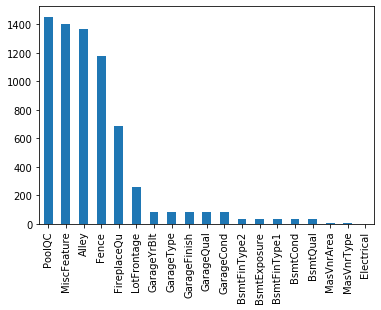

* __Excluding categorical features with too many classes to avoid overfitting__



Data Processing - Log Transformation of Target
---------
* __Sale Price__
<img src="../Graphs/y.png" style="width: 300px;"/>
* __log(Sale Price)__
<img src="../Graphs/logy.png" style="width: 300px;"/>

Pipeline
------

* __Numerical:__ impute with median
* __Categorical:__ impute with most common / one hot encoding.

Feature Selection
---------

* __Naive selection__ - selection includes squarefeet, neiborhood and housestyle, year built based on intuition.
* __Full Model__ - all features included.
* __Reduced Model__ - feature removed based on permutation importance score.



Modelling Approach
--------

* __Linear Regression (Lasso)__
* __Random Forest Regressor__
* __Graient Boosting Regressor__

Model Evaluation Preliminary Results (Naive Selection):
--------
<img src="../Graphs/Naive2.png" style="width: 800px;"/>




Model Evaluation Preliminary Results (Full Model):
--------

<img src="../Graphs/Full.png" style="width: 800px;"/>


Permutation Importance
-------

* __Most Significant Features__
<img src="../Graphs/important features.png" style="width: 500px;"/>




Permutation Importance
-------

* __Least Significant__
<img src="../Graphs/unimportant_features.png" style="width: 500px;"/>



Model Evaluation Preliminary Results (Reduced Model):
--------

<img src="../Graphs/Reduced.png" style="width: 800px;"/>

Limitations
----------
#### 1. Not suited for broad applications, data is collected in one specific state.

#### 2. Macros such as inflation, impact on the larger economic scale is difficult to guage and be taken into account in the model.

Future Work
-----------

#### 1. Hyperparameter fine-tuning
#### 2. Further investigation in feature importance of categorical variable (Label Encoding, One hot encoding, Drop subset)
#### 3. Dimension reduction and feature elimination for precision


# THANK YOU!!

<img src="../Graphs/thankyou.jpeg" style="width: 800px;"/>


EDA
---------
Graphs to be included placeholders (challenges to address in challenges)

* 


Modelling Approach
--------
1. Linear Regression Lasso
2. Random Forest Regressor
3. Graient Boosting Regressor

Data Cleaning and Pipeline
------------

1. Numerical Data

2. Categorical Data

Load Data
-----

In [2]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import compose
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Data/train.csv")

y = data.SalePrice
X = data.drop(['SalePrice'], axis=1)


Fit scikit-learn model
----

In [3]:
def make_pipelines(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
        
    numeric_features = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFullBath','BsmtHalfBath','BsmtUnfSF',
                       'EnclosedPorch','Fireplaces','FullBath','GarageArea','GarageCars','GarageYrBlt','GrLivArea','HalfBath',
                       'KitchenAbvGr','LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal','MoSold','MSSubClass','OpenPorchSF',
                       'OverallCond','OverallQual','PoolArea','ScreenPorch','YrSold', 'YearRemodAdd', 'YearBuilt', 'WoodDeckSF', 
                        'TotRmsAbvGrd', 'TotalBsmtSF']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    categorical_features = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtQual','CentralAir','Condition1','Condition2',
                           'Electrical','ExterCond','Exterior1st','Exterior2nd','ExterQual','Foundation','Functional','GarageType',
                           'Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
                           'MasVnrType','MiscFeature','MSZoning','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
                           'SaleType','Street','Utilities']
    categorical_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='constant', fill_value='most_frequent')),
                                              ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
    
    
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                           ('cat', categorical_transformer, categorical_features)])
    
    pipe_rf = Pipeline([('preprocessor', preprocessor),
                        ('clf', RandomForestRegressor(n_estimators=30, min_samples_leaf=10, random_state=42))])
    pipe_lasso = Pipeline([('preprocessor', preprocessor),
                           ('clf', linear_model.Lasso(alpha=0.1))])
    pipe_gbr = Pipeline([('preprocessor', preprocessor),
                           ('clf', GradientBoostingRegressor())])
    
    pipeline = [pipe_rf, pipe_lasso, pipe_gbr]

    
    return pipeline

In [4]:
pipelines = make_pipelines()

In [5]:
def make_pipelines2(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
        
    numeric_features = ['1stFlrSF','2ndFlrSF','YrSold',  'YearBuilt']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    categorical_features = ['HouseStyle','Neighborhood','Street']
    categorical_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='constant', fill_value='most_frequent')),
                                              ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
    
    
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                           ('cat', categorical_transformer, categorical_features)])
    
    pipe_rf = Pipeline([('preprocessor', preprocessor),
                        ('clf', RandomForestRegressor(n_estimators=30, min_samples_leaf=10, random_state=42))])
    pipe_lasso = Pipeline([('preprocessor', preprocessor),
                           ('clf', linear_model.Lasso(alpha=0.1))])
    pipe_gbr = Pipeline([('preprocessor', preprocessor),
                           ('clf', GradientBoostingRegressor())])
    
    pipeline = [pipe_rf, pipe_lasso, pipe_gbr]

    
    return pipeline

In [6]:
pipelines2 = make_pipelines2()

In [7]:
def make_pipelines3(regressor=None):
    "Create a single pipeline that processing the data and then fits the regressor." 
        
    numeric_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', '1stFlrSF', 
                        'YearBuilt', '2ndFlrSF', 'YearRemodAdd', 'LotArea', 'GarageYrBlt', 'LotFrontage', 
                        'OverallCond', 'GarageArea', 'OpenPorchSF', 'Fireplaces', 'FullBath', 'BsmtUnfSF',
                        'YrSold', 'BsmtFullBath', 'MSSubClass', 'WoodDeckSF', 'KitchenAbvGr', 'HalfBath', 
                        '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'MasVnrArea', 'MiscVal']
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median'))])
    
    categorical_features = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtQual','CentralAir','Condition1','Condition2',
                           'Electrical','ExterCond','Exterior1st','Exterior2nd','ExterQual','Foundation','Functional','GarageType',
                           'Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
                           'MasVnrType','MiscFeature','MSZoning','Neighborhood','PavedDrive','RoofMatl','RoofStyle','SaleCondition',
                           'SaleType','Street','Utilities']
    categorical_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='constant', fill_value='most_frequent')),
                                              ('onehot', preprocessing.OneHotEncoder(handle_unknown='ignore'))])
    
    
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                           ('cat', categorical_transformer, categorical_features)])
    
    pipe_rf = Pipeline([('preprocessor', preprocessor),
                        ('clf', RandomForestRegressor(n_estimators=30, min_samples_leaf=10, random_state=42))])
    pipe_lasso = Pipeline([('preprocessor', preprocessor),
                           ('clf', linear_model.Lasso(alpha=0.1))])
    pipe_gbr = Pipeline([('preprocessor', preprocessor),
                           ('clf', GradientBoostingRegressor())])
    
    pipeline = [pipe_rf, pipe_lasso, pipe_gbr]

    
    return pipeline

In [8]:
pipelines3 = make_pipelines3()

Evaluation Metric
----

In [9]:
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import m
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

In [10]:
def MAPE(predict,target):
    return (abs((target - predict) / target).mean()) * 100

In [11]:
def mae(pipelines, X, y):
    d_test = dict()
    d_train = dict()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    for pipe in pipelines:
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
        mae = round(median_absolute_error(y_test, y_pred), 2)
        mse = round(mean_squared_error(y_test, y_pred), 2)
        r2 = round(r2_score(y_test, y_pred), 2)
        mape = MAPE(y_test, y_pred)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        d_test[name] = [mae, mse, r2, mape, rmse]
        
    for pipe in pipelines:
        pipe.fit(X, y)
        y_pred = pipe.predict(X)
        name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
        mae_train = round(median_absolute_error(y, y_pred), 2)
        mse_train = round(mean_squared_error(y, y_pred), 2)
        r2_train = round(r2_score(y, y_pred), 2)
        mape_train = MAPE(y, y_pred)
        rmse_train = sqrt(mean_squared_error(y, y_pred))
        d_train[name] = [mae_train, mse_train, r2_train, mape_train, rmse_train]
    return d_test,d_train

In [12]:
d_test, d_train = mae(pipelines, X, np.log(y+1))

In [13]:
df_test = pd.DataFrame(d_test.values(), d_test.keys())
df_train = pd.DataFrame(d_train.values(), d_train.keys())

In [14]:
df_test.columns = ['MAE', 'MSE', 'R^2', 'MAPE', 'rmsle']
df_train.columns = ['MAE_train', 'MSE_train', 'R^2_train', 'MAPE_train', 'rmsle']

In [15]:
df_test

,MAE,MSE,R^2,MAPE,rmsle
RandomForestRegressor,0.07,0.02,0.86,0.869544,0.155604
Lasso,0.08,0.03,0.81,1.001921,0.179815
GradientBoostingRegressor,0.06,0.02,0.89,0.758071,0.139942


In [16]:
df_train

,MAE_train,MSE_train,R^2_train,MAPE_train,rmsle
RandomForestRegressor,0.05,0.01,0.91,0.653651,0.119048
Lasso,0.07,0.03,0.80,0.953432,0.179829
GradientBoostingRegressor,0.05,0.01,0.96,0.496677,0.080476


In [17]:
d_test2, d_train2 = mae(pipelines2, X, np.log(y+1))
df_test2 = pd.DataFrame(d_test2.values(), d_test2.keys())
df_train2 = pd.DataFrame(d_train2.values(), d_train2.keys())
df_test2.columns = ['MAE', 'MSE', 'R^2', 'MAPE', 'rmsle']
df_train2.columns = ['MAE_train', 'MSE_train', 'R^2_train', 'MAPE_train', 'rmsle']




In [18]:
df_test2

,MAE,MSE,R^2,MAPE,rmsle
RandomForestRegressor,0.09,0.04,0.79,1.084460,0.189584
Lasso,0.10,0.04,0.77,1.157128,0.197627
GradientBoostingRegressor,0.09,0.03,0.82,1.042674,0.176126


In [19]:
df_train2

,MAE_train,MSE_train,R^2_train,MAPE_train,rmsle
RandomForestRegressor,0.08,0.03,0.83,0.937456,0.162844
Lasso,0.10,0.04,0.72,1.181609,0.210453
GradientBoostingRegressor,0.08,0.02,0.88,0.847233,0.137015


In [20]:
d_test3, d_train3 = mae(pipelines3, X, np.log(y+1))
df_test3 = pd.DataFrame(d_test3.values(), d_test3.keys())
df_train3 = pd.DataFrame(d_train3.values(), d_train3.keys())
df_test3.columns = ['MAE', 'MSE', 'R^2', 'MAPE', 'rmsle']
df_train3.columns = ['MAE_train', 'MSE_train', 'R^2_train', 'MAPE_train', 'rmsle']



In [21]:
df_test3

,MAE,MSE,R^2,MAPE,rmsle
RandomForestRegressor,0.07,0.02,0.86,0.868982,0.155697
Lasso,0.07,0.03,0.82,0.993663,0.176429
GradientBoostingRegressor,0.06,0.02,0.89,0.759449,0.139123


In [22]:
df_train3

,MAE_train,MSE_train,R^2_train,MAPE_train,rmsle
RandomForestRegressor,0.05,0.01,0.91,0.653271,0.119128
Lasso,0.08,0.03,0.79,0.962337,0.183318
GradientBoostingRegressor,0.05,0.01,0.96,0.502607,0.081584


In [23]:
from IPython.display import display, HTML

In [31]:
print ( "Reduced Model Training:")
display(df_train)
print ( "\nReduced Model Testing:")
display(df_test)

Reduced Model Training:


,MAE_train,MSE_train,R^2_train,MAPE_train,rmsle
RandomForestRegressor,0.05,0.01,0.91,0.653651,0.119048
Lasso,0.07,0.03,0.80,0.953432,0.179829
GradientBoostingRegressor,0.05,0.01,0.96,0.496677,0.080476



Reduced Model Testing:


,MAE,MSE,R^2,MAPE,rmsle
RandomForestRegressor,0.07,0.02,0.86,0.869544,0.155604
Lasso,0.08,0.03,0.81,1.001921,0.179815
GradientBoostingRegressor,0.06,0.02,0.89,0.758071,0.139942


Results
---------


